In [4]:
import matplotlib.pyplot as plt
import loompy
import numpy as np

In [20]:
endo = 'HumanMeningesDev_Vascular_endothelial.loom'
endo_brain = 'HumanBrainDev_Vascular_Endo_Clean_FB_copy.loom'
perivas = 'HumanMeningesDev_Vascular_perivascular.loom'

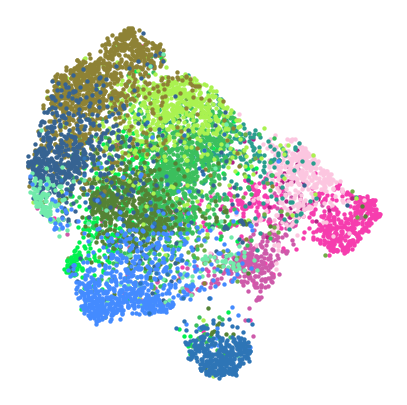

In [7]:
colors = ['#F63DAE','#CE5AAA','#B12484','#FCC6E0',
              '#299E8E','#70AD47','#2ACD48','#00F250','#3BBF5D','#548235','#AAF250',
              '#8E8235','#366392','#71EBAB','#448BFF','#2E75B6']    

plt.figure(None, (5,5))
with loompy.connect(perivas, 'r') as ds:
    clusters = np.unique(ds.ca.Clusters)

    for i,a in enumerate(clusters):
        ix = (ds.ca.Clusters == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], lw=0, s=10) #, s=2
        plt.axis('off')

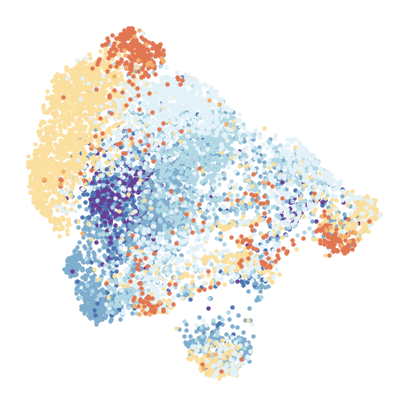

In [8]:
colors = ['#7EADCE','#4D74B2','#4D74B2','#683F97','#7EADCE','#B2D8E6','#FADF9E','#E3F2F9','#E3F2F9','#E17651','#F2B06C'] 
Age = ['7.5w','6.6w','6.7w','5.5w','7.6w','8.4w','10w','9w','9.9w','13.5w','12w']

plt.figure(None, (5,5))
with loompy.connect(perivas, 'r') as ds:

    for i,a in enumerate(Age):
        exp = ds.ca.Agetext
        ix = (ds.ca.Agetext == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], lw=0, s=10) 
        plt.axis('off')

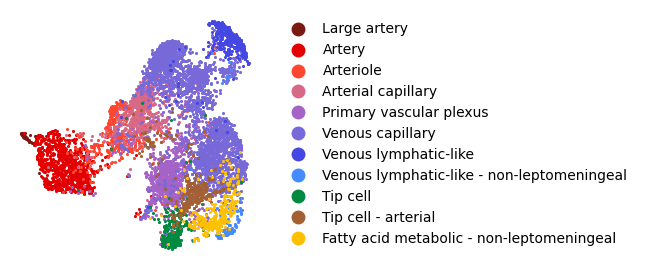

In [11]:
colors = ['#7A1911','#E20000','#FF4630','#D76886',
          '#A562C7','#7769D8','#4447E2',
          '#448BFF',
          '#008941','#A26033','#FFC000'] 
subc = ['Large artery','Artery','Arteriole','Arterial capillary',
        'Primary vascular plexus','Venous capillary','Venous lymphatic-like',
        'Venous lymphatic-like - non-leptomeningeal',
        'Tip cell', 'Tip cell - arterial', 'Fatty acid metabolic - non-leptomeningeal']

fig = plt.figure(None, (10, 2.5))
with loompy.connect(endo, 'r') as ds:
    ax = fig.add_axes([0, 0, 0.25, 1])
    for i, a in enumerate(subc):
        ix = (ds.ca.CellType == a)
        ax.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], s=5, lw=0)
        ax.axis('off')
    
    ax2 = fig.add_axes([0.58, 0, 0.05, 1])
    h = lambda c: plt.Line2D([],[],color=c, ls="",marker="o")
    ax2.legend(handles=[h(colors[i]) for i in range(len(subc))],
            labels=list(subc),
            markerscale=1.5, 
            frameon=False,
            fontsize=10)
    ax2.axis('off')

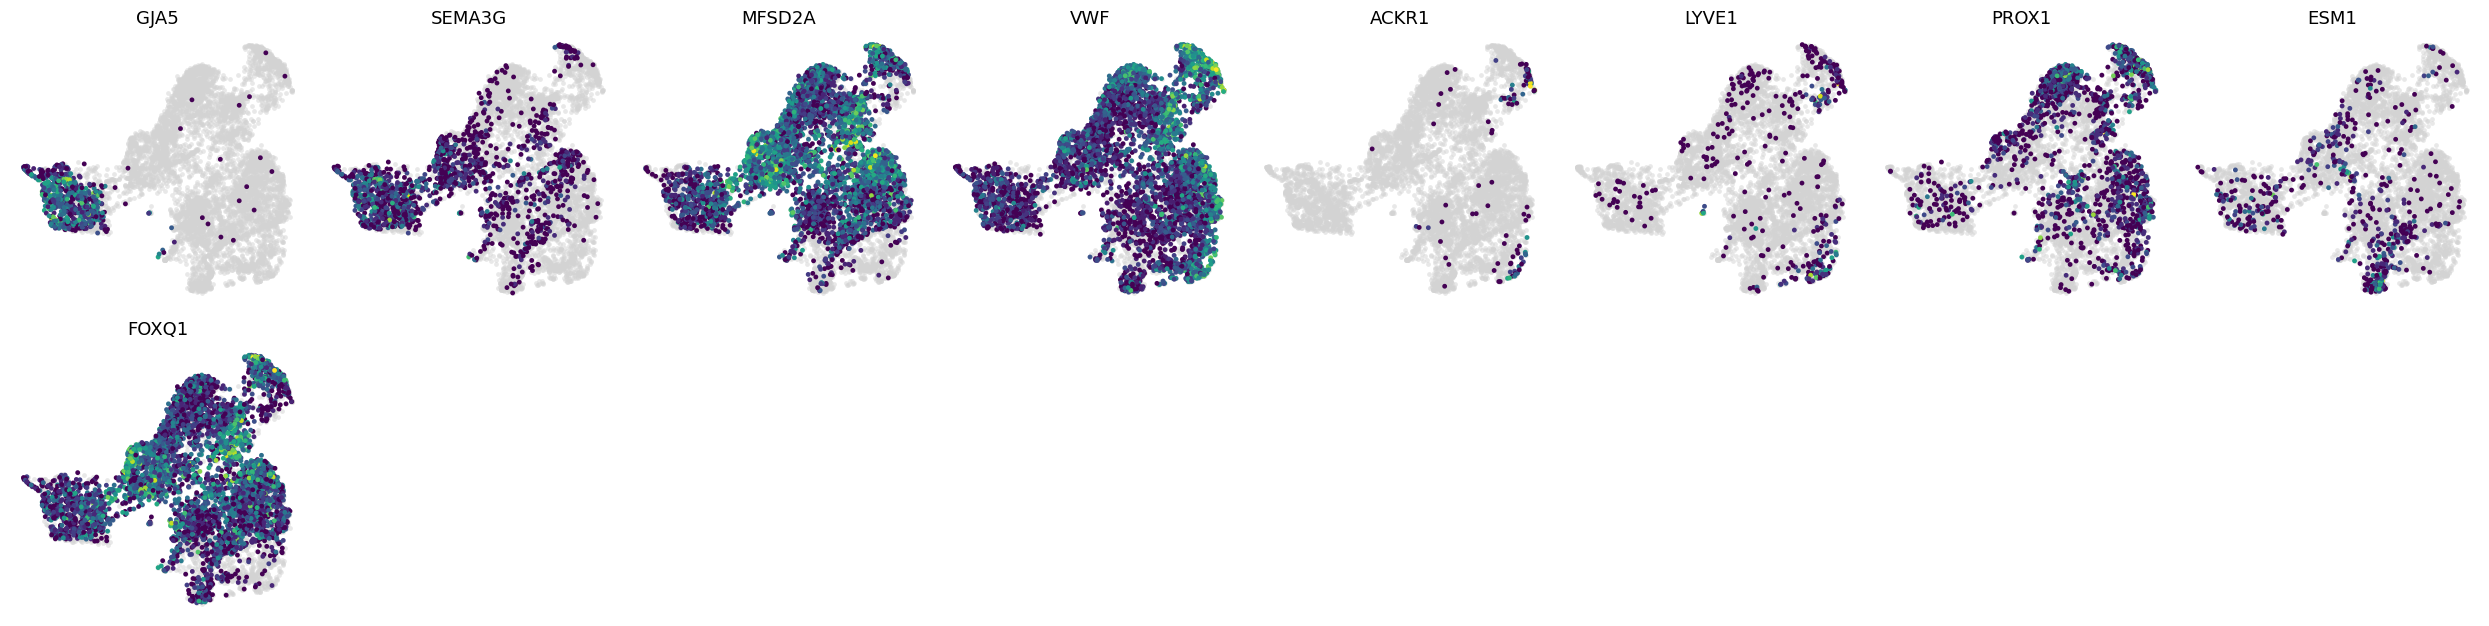

In [12]:
with loompy.connect(endo, 'r') as ds:
    plt.figure(None, (25, 25))
    gs = plt.GridSpec(8, 8)

    to_plot = ['GJA5','SEMA3G','MFSD2A','VWF','ACKR1','LYVE1','PROX1','ESM1','FOXQ1']

    for i, g in enumerate(to_plot):
        plt.subplot(gs[i])
        exp = np.log(ds[np.where(ds.ra.Gene == g)[0][0], :].flatten() + 1)
        exp_cells = exp > 0
        plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], color='lightgrey', alpha=0.5, s=12, lw=0)
        plt.scatter(ds.ca.UMAP[exp_cells, 0], ds.ca.UMAP[exp_cells, 1], c=exp[exp_cells], s=12, lw=0)
        plt.axis('off')
        plt.title(g, fontsize=13)
        plt.margins(0.05, 0.05)
        plt.tight_layout()
    plt.show()

# Endothelial over time

In [13]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from numpy_groupies.aggregate_numpy import aggregate

In [14]:
with loompy.connect(endo,'r') as ds:
    print((np.unique(ds.ca.CellType)))
    print(len(np.unique(ds.ca.CellType)))

['Arterial capillary' 'Arteriole' 'Artery'
 'Fatty acid metabolic - non-leptomeningeal' 'Large artery'
 'Primary vascular plexus' 'Tip cell' 'Tip cell - arterial'
 'Venous capillary' 'Venous lymphatic-like'
 'Venous lymphatic-like - non-leptomeningeal']
11


In [15]:
with loompy.connect(endo,'r') as ds:
    celltype = ds.ca.CellType
    age = ds.ca.Age

In [16]:
labels = np.unique(celltype)
counts = np.zeros((11, 14), dtype="int")  #(number of cell types, number of timepoints) - meninges
for i, sc in enumerate(labels):
    print(sc)
    counts[i, :] = aggregate(age.astype("int"), (celltype == sc).astype("int"), func="sum")

Arterial capillary
Arteriole
Artery
Fatty acid metabolic - non-leptomeningeal
Large artery
Primary vascular plexus
Tip cell
Tip cell - arterial
Venous capillary
Venous lymphatic-like
Venous lymphatic-like - non-leptomeningeal


In [17]:
ncounts = np.delete(counts, 11, axis=1) # - meninges
print(ncounts)
np.seterr(divide='ignore', invalid='ignore')
ncounts = ncounts / ncounts.sum(axis=0)

[[  0   0   0   0   0   2   1  13   5 182 499   4  11]
 [  0   0   0   0   0   3  12  37  67 101  30  10 187]
 [  0   0   0   0   0  82  58 157 122 168 311   5  69]
 [  0   0   0   0   0  14  53 215  23  14   4   0   1]
 [  0   0   0   0   0   0   0   0   1  10  37   0   0]
 [  0   0   0   0   0 266 267 282  90  40  21   2   9]
 [  0   0   0   0   0   2   1  94  62  69  66   0   2]
 [  0   0   0   0   0   1  10  90 249   1   0   0   0]
 [  0   0   0   0   0   0   9 561 611 633 875   3   9]
 [  0   0   0   0   0   0   1   1   1   3   4  18 390]
 [  0   0   0   0   0   0   0  21  14  36  33   2   1]]


Text(0.5, 1.0, 'Meninges')

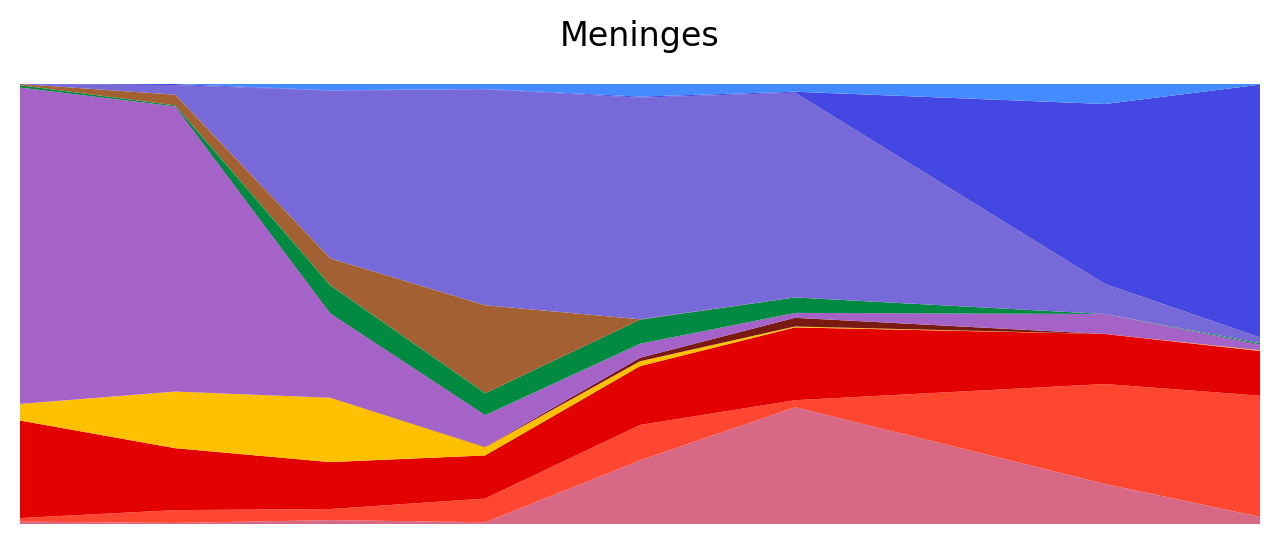

In [18]:
colors = ['#D76886','#FF4630','#E20000','#FFC000','#7A1911',
          '#A562C7','#008941','#A26033','#7769D8','#4447E2','#448BFF']

plt.figure(figsize=(8,3))
x = np.arange(14)
x = np.delete(x, 11)
plt.stackplot(x, ncounts, labels=labels, colors=colors)
plt.xlim(5, 13)
#plt.legend(loc='upper right', fontsize=8)
plt.axis("off")
plt.title('Meninges')

In [21]:
with loompy.connect(endo_brain,'r') as ds:
    celltype = ds.ca.CellType
    age = ds.ca.Age

In [22]:
labels = np.unique(celltype)
counts = np.zeros((6, 15), dtype="int") # - forebrain
for i, sc in enumerate(labels):
    print(sc)
    counts[i, :] = aggregate(age.astype("int"), (celltype == sc).astype("int"), func="sum")

Arterial capillary
Arteriole
Artery
Capillary
Primitive vascular plexus
Venous lymphatic-like/Fatty acid metabolic


In [23]:
ncounts = np.delete(counts, 6, axis=1) # - forebrain
print(ncounts)
np.seterr(divide='ignore', invalid='ignore')
ncounts = ncounts / ncounts.sum(axis=0)

[[  0   0   0   0   0   0   7  15   3   7 111 156  30  78]
 [  0   0   0   0   0   0   1   3   0   0 237  42  17  17]
 [  0   0   0   0   0   2   2  11   7   3  22  47  17  18]
 [  0   0   0   0   0   1   2   6   2   4   8   5   2   3]
 [  0   0   0   0   0   2   7  18  12  17   6   2   1   5]
 [  0   0   0   0   0  17   0  28   3   1   8   3   3  15]]


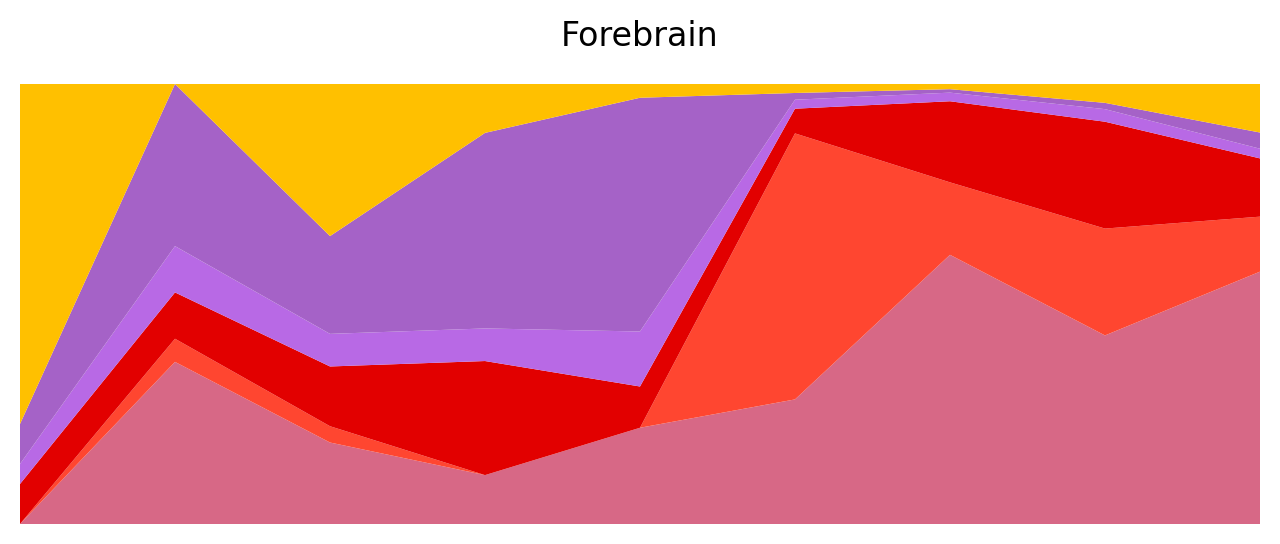

In [24]:
colors = ['#D76886','#FF4630','#E20000','#B869E5','#A562C7','#FFC000']
plt.figure(figsize=(8,3))
x = np.arange(15)
x = np.delete(x, 14)
plt.stackplot(x, ncounts, labels=labels, colors=colors)
plt.xlim(5, 13)
#plt.legend(loc='upper right', fontsize=8)
plt.axis("off")
plt.title('Forebrain')
None